In [95]:
import pandas as pd
import numpy as np
import time

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper, JSON
import sklearn
from sklearn.cluster import AgglomerativeClustering
from IPython.core.display import display

import time

import urllib.request
from bs4 import BeautifulSoup
import pyjsparser

import re
from collections import defaultdict

import pathos

import networkx as nx

In [97]:
df_tmp = pd.read_csv("data/wahlomat/titles.dat", 
            sep = "\t", 
            encoding = "iso-8859-15",
            header = None)
df_tmp = pd.DataFrame({ "W_Etitle" : list(df_tmp.iloc[0::3, 0]),
                       "W_title" : list(df_tmp.iloc[1::3, 0]),
                       "W_description" : list(df_tmp.iloc[2::3, 0]) })
df_tmp.to_excel("output/df_wahlomat_mmev.xls", index = False)

In [98]:
df_eurovoc_doc_full = pd.read_csv("output/df_eurovoc_doc_full.csv", sep = "\t")
df_eurovoc_doc_full

cellar      ID  \
0       f3931f63-15d2-11e7-808e-01aa75ed71a1  434966   
1       f3931f63-15d2-11e7-808e-01aa75ed71a1    4195   
2       f3931f63-15d2-11e7-808e-01aa75ed71a1    2098   
3       f3931f63-15d2-11e7-808e-01aa75ed71a1    1459   
4       f3931f63-15d2-11e7-808e-01aa75ed71a1     560   
5       f3931f63-15d2-11e7-808e-01aa75ed71a1    4491   
6       f3931f63-15d2-11e7-808e-01aa75ed71a1     248   
7       f3931f63-15d2-11e7-808e-01aa75ed71a1    5235   
8       e7e0c788-4d2a-11e3-ae03-01aa75ed71a1  434966   
9       e7e0c788-4d2a-11e3-ae03-01aa75ed71a1  434880   
10      e7e0c788-4d2a-11e3-ae03-01aa75ed71a1    1318   
11      e7e0c788-4d2a-11e3-ae03-01aa75ed71a1  434004   
12      e7e0c788-4d2a-11e3-ae03-01aa75ed71a1    4668   
13      e7e0c788-4d2a-11e3-ae03-01aa75ed71a1    5650   
14      0053cbe4-8290-11e3-9b7d-01aa75ed71a1  434966   
15      0053cbe4-8290-11e3-9b7d-01aa75ed71a1    5898   
16      0053cbe4-8290-11e3-9b7d-01aa75ed71a1    2527   
17      0053cbe4-8290-11e3-9b7d-01aa75ed71a1    4833   
18      0053cbe4-8290-11e3-9b7d-01aa75ed71a1    3164   
19      0053cbe4-8290-11e3-9b7d-01aa75ed71a1     177   
20      005ef2ea-cac4-11e3-9fe4-01aa75ed71a1  434966   
21      005ef2ea-cac4-11e3-9fe4-01aa75ed71a1  434880   
22      005ef2ea-cac4-11e3-9fe4-01aa75ed71a1    1019   
23      005ef2ea-cac4-11e3-9fe4-01aa75ed71a1  434004   
24      005ef2ea-cac4-11e3-9fe4-01aa75ed71a1    2505   
25      ae0737c9-4940-11e3-ae03-01aa75ed71a1  434966   
26      ae0737c9-4940-11e3-ae03-01aa75ed71a1  434843   
27      ae0737c9-4940-11e3-ae03-01aa75ed71a1    4438   
28      ae0737c9-4940-11e3-ae03-01aa75ed71a1    5650   
29      ae0737c9-4940-11e3-ae03-01aa75ed71a1    6400   
...                                      ...     ...   
180035  47ef4bd7-5cce-11e3-914b-01aa75ed71a1    3645   
180036  47ef4bd7-5cce-11e3-914b-01aa75ed71a1    5864   
180037  af26e64a-06ea-4d0d-82fc-ea10a30ff7b0    3430   
180038  af26e64a-06ea-4d0d-82fc-ea10a30ff7b0    3645   
180039  af26e64a-06ea-4d0d-82fc-ea10a30ff7b0    4430   
180040  af26e64a-06ea-4d0d-82fc-ea10a30ff7b0    5864   
180041  af26e64a-06ea-4d0d-82fc-ea10a30ff7b0    5956   
180042  7c435406-04e9-4861-be6b-55faf30d338f    4316   
180043  7c435406-04e9-4861-be6b-55faf30d338f    4315   
180044  7c435406-04e9-4861-be6b-55faf30d338f     276   
180045  7c435406-04e9-4861-be6b-55faf30d338f    4170   
180046  9e1c15a8-a78a-49f9-8162-a5a19abc41a0    4316   
180047  9e1c15a8-a78a-49f9-8162-a5a19abc41a0    4315   
180048  9e1c15a8-a78a-49f9-8162-a5a19abc41a0     276   
180049  9e1c15a8-a78a-49f9-8162-a5a19abc41a0    4170   
180050  096621a4-dcb2-4b27-bfe8-ba065ed74aa6    4316   
180051  096621a4-dcb2-4b27-bfe8-ba065ed74aa6    4315   
180052  096621a4-dcb2-4b27-bfe8-ba065ed74aa6     276   
180053  eba0dff1-76da-49dc-9720-87fe3dc2d9b9    4316   
180054  eba0dff1-76da-49dc-9720-87fe3dc2d9b9    4315   
180055  eba0dff1-76da-49dc-9720-87fe3dc2d9b9     276   
180056  eba0dff1-76da-49dc-9720-87fe3dc2d9b9    4170   
180057  1bbc4f25-e703-490c-90ed-e78ab8824020     431   
180058  1bbc4f25-e703-490c-90ed-e78ab8824020      86   
180059  8cb2dd4d-edbc-455a-84d1-9dea109c638f     431   
180060  8cb2dd4d-edbc-455a-84d1-9dea109c638f    1184   
180061  c39db218-5762-4144-b3e3-25db533e2565     431   
180062  ae28bf38-cbac-4d39-a289-b915e6ded76c    5872   
180063  47cd42b9-8a26-42bf-96e2-64af0bad7e81    1433   
180064  ec382043-7490-4031-a126-f1ec17e40a28    1433   

                                        ev   mID  \
0                       emission allowance  5206   
1                       investment company  2416   
2                                     bond  2421   
3                     financial instrument  2421   
4                    financial legislation  2421   
5                    financial transaction  2421   
6                   stock-exchange listing  2421   
7                       technical standard  6411   
8                       emission allowance  5206   
9              EU Emissions Trading Scheme  5

In [99]:
df_eurovoc_doc_full[["mmID", "mmev"]].drop_duplicates()

mmID                                 mmev
0       52                          ENVIRONMENT
1       24                              FINANCE
7       64  PRODUCTION, TECHNOLOGY AND RESEARCH
10      72                            GEOGRAPHY
11       8              INTERNATIONAL RELATIONS
12      20                                TRADE
17      68                             INDUSTRY
24      56  AGRICULTURE, FORESTRY AND FISHERIES
27      48                            TRANSPORT
32      10                       EUROPEAN UNION
49       4                             POLITICS
61      76          INTERNATIONAL ORGANISATIONS
70      32         EDUCATION AND COMMUNICATIONS
72      16                            ECONOMICS
73      44    EMPLOYMENT AND WORKING CONDITIONS
79      28                     SOCIAL QUESTIONS
95      66                               ENERGY
105     40             BUSINESS AND COMPETITION
119     60                      AGRI-FOODSTUFFS
124     12                                  LAW
1186    36                              SCIENCE

In [100]:
pd.read_excel("output/df_wahlomat_mmID.xls")

W_Etitle  \
0                              Euro   
1                 EU-wide Referenda   
2       Genetically Modified Plants   
3                 Refuge Admissions   
4                      Minimum Wage   
5                      EU Expansion   
6                      Eco-Breeding   
7                Asylum for Snowden   
8                   Social Benefits   
9         Financial Transaction Tax   
10        Christian Value Community   
11   Agricultural Subsidy Reduction   
12                    Women's Quota   
13                EU Defence Forces   
14  Direct Election of EC President   
15                   Same-Sex Union   
16               Protective Tariffs   
17                     CO2-Emission   
18                             TTIP   
19            Right-Wing Extremism    
20                        Eurobonds   
21           Training Qalifications   
22              Accedence of Turkey   
23                  Corporate Taxes   
24                     Prostitution   
25                EU Foreign Policy   
26         Nationalization of Banks   
27                      Asylum Laws   
28              EU Treaty Referenda   
29                  Traffic Network   
30           Development Assistance   
31        Product Energy Efficiency   
32                   European Taxes   
33                   Organ Donation   
34                 Regional Support   
35                  Border Controls   
36                    Executive Pay   
37          United States of Europe   

                                       W_title  \
0                                         Euro   
1                    EU-weite Bürgerentscheide   
2             Gentechnisch veränderte Pflanzen   
3                    Aufnahme von Flüchtlingen   
4                                  Mindestlohn   
5                               EU-Erweiterung   
6                      Ökologische Tierhaltung   
7                             Asyl für Snowden   
8                             Sozialleistungen   
9                     Finanztransaktionssteuer   
10               Christliche Wertegemeinschaft   
11                 Abbau der Agrarsubventionen   
12                                 Frauenquote   
13                                 Europaarmee   
14       Direktwahl des Kommissionspräsidenten   
15                  Gleichgeschlechtliche Ehen   
16                                 Schutzzölle   
17                                 CO2-Ausstoß   
18             Freihandelsabkommen mit den USA   
19            Projekte gegen Rechtsextremismus   
20                                   Eurobonds   
21           Anerkennung von Berufsabschlüssen   
22                         Beitritt der Türkei   
23         Mindestsatz für Unternehmenssteuern   
24                                Prostitution   
25                  Ausbau der EU-Außenpolitik   
26                  Verstaatlichung von Banken   
27                                 Asylgesetze   
28  Volksentscheide über EU-Vertragsänderungen   
29                                Verkehrsnetz   
30                        EU-Entwicklungshilfe   
31                        Verbot von Produkten   
32                         Europäische Steuern   
33                                 Organspende   
34                           Regionalförderung   
35                             Grenzkontrollen   
36                             Managergehälter   
37               Vereinigte Staaten von Europa   

                                        W_description        mmID  
0     Deutschland soll den Euro als Währung behalten.          24  
1   Es sollen EU-weite gemeinsame Bürgerentscheide...           4  
2   Der Anbau von gentechnisch veränderten Pflanze...    52,56,60  
3   Die EU-Mitgliedsstaaten sollen mehr Flüchtling...          28  
4   Einführung eines EU-weiten Mindestlohns, desse...          44  
5   Die Europäische Union soll keine neuen Mitglie...          10  
6   Die Europäische Union soll ausschließlich ökol...          52  
7   Edward

In [111]:
df_wahlomat = pd.read_excel("output/df_wahlomat_mmID.xls")
df_wahlomat["W_Etitle"] = df_wahlomat["W_Etitle"].str.replace(" ", "\n")
df_wahlomat["FID"] = df_wahlomat.index + 1
df_tmp = df_wahlomat["mmID"].astype("str").str.split(",", expand = True).stack().astype("int")
df_tmp.index = df_tmp.index.droplevel(1)
df_tmp.name = "mmID"
df_tmp = pd.concat([df_wahlomat[["FID", "W_Etitle", "W_description"]], df_tmp], axis = 1)
#display(df_tmp.head())
#display(df_eurovoc_doc_full[["mmID", "mmev"]].drop_duplicates().head())
df_wahlomat = df_tmp.merge(df_eurovoc_doc_full[["mmID", "mmev"]].drop_duplicates()).sort_values("FID")
df_wahlomat
#df_tmp["mmID"]
#df_eurovoc_doc_full["mmID"]

FID                                           W_Etitle  \
0     1                                               Euro   
6     2                                 EU-wide\nReferenda   
16    3                      Genetically\nModified\nPlants   
14    3                      Genetically\nModified\nPlants   
9     3                      Genetically\nModified\nPlants   
17    4                                 Refuge\nAdmissions   
26    5                                      Minimum\nWage   
30    6                                      EU\nExpansion   
10    7                                       Eco-Breeding   
35    8                               Asylum\nfor\nSnowden   
37    8                               Asylum\nfor\nSnowden   
18    9                                   Social\nBenefits   
1    10                        Financial\nTransaction\nTax   
19   11                        Christian\nValue\nCommunity   
15   12                   Agricultural\nSubsidy\nReduction   
27   13                                     Women's\nQuota   
38   13                                     Women's\nQuota   
20   13                                     Women's\nQuota   
39   14                                EU\nDefence\nForces   
7    15                Direct\nElection\nof\nEC\nPresident   
21   16                                    Same-Sex\nUnion   
44   17                                Protective\nTariffs   
11   18                                       CO2-Emission   
45   19  Transatlantic\nTrade\nand\nInvestment\nPartner...   
22   20                            Right-Wing\nExtremism\n   
2    21                                          Eurobonds   
28   22                            Training\nQalifications   
31   23                              Accedence\nof\nTurkey   
3    24                                   Corporate\nTaxes   
36   25                                       Prostitution   
23   25                                       Prostitution   
46   26                                EU\nForeign\nPolicy   
40   26                                EU\nForeign\nPolicy   
32   26                                EU\nForeign\nPolicy   
4    27                         Nationalization\nof\nBanks   
24   28                                       Asylum\nLaws   
33   29                              EU\nTreaty\nReferenda   
41   29                              EU\nTreaty\nReferenda   
8    29                              EU\nTreaty\nReferenda   
12   30                                   Traffic\nNetwork   
47   30                                   Traffic\nNetwork   
42   31                            Development\nAssistance   
48   32                        Product\nEnergy\nEfficiency   
13   32                        Product\nEnergy\nEfficiency   
5    33                                    European\nTaxes   
25   34                                    Organ\nDonation   
49   35                                  Regional\nSupport   
43   36                                   Border\nControls   
29   37                                     Executive\nPay   
34   38                         United\nStates\nof\nEurope   

                                        W_description  mmID  \
0     Deutschland soll den Euro als Währung behalten.    24   
6   Es sollen EU-weite gemeinsame Bürgerentscheide...     4   
16  Der Anbau von gentechnisch veränderten Pflanze...    60   
14  Der Anbau von gentechnisch veränderten Pflanze...    56   
9   Der Anbau von gentechnisch veränderten Pflanze...    52   
17  Die EU-Mitgliedsstaaten sollen mehr Flüchtling...    28   
26  Einführung eines EU-weiten Mindestlohns, desse...    44   
30  Die Europäische Union soll keine neuen Mitglie...    10   
10  Die Europäische Union soll ausschließlich ökol...    52   
35  Edward Snowden soll in einem EU-Mitgliedsstaat...    12   
37  Edward Snowden soll in einem EU-Mitgliedsstaat...    32   
18  EU-Bürger sollen Sozialleistungen nur von ihre...    28   
1   Einführung einer S

In [112]:
df_wahlomat.sort_values("mmev")

FID                                           W_Etitle  \
16    3                      Genetically\nModified\nPlants   
14    3                      Genetically\nModified\nPlants   
15   12                   Agricultural\nSubsidy\nReduction   
38   13                                     Women's\nQuota   
49   35                                  Regional\nSupport   
37    8                               Asylum\nfor\nSnowden   
29   37                                     Executive\nPay   
28   22                            Training\nQalifications   
26    5                                      Minimum\nWage   
27   13                                     Women's\nQuota   
48   32                        Product\nEnergy\nEfficiency   
11   18                                       CO2-Emission   
12   30                                   Traffic\nNetwork   
13   32                        Product\nEnergy\nEfficiency   
10    7                                       Eco-Breeding   
9     3                      Genetically\nModified\nPlants   
33   29                              EU\nTreaty\nReferenda   
30    6                                      EU\nExpansion   
32   26                                EU\nForeign\nPolicy   
31   23                              Accedence\nof\nTurkey   
34   38                         United\nStates\nof\nEurope   
4    27                         Nationalization\nof\nBanks   
3    24                                   Corporate\nTaxes   
5    33                                    European\nTaxes   
2    21                                          Eurobonds   
0     1                                               Euro   
1    10                        Financial\nTransaction\nTax   
46   26                                EU\nForeign\nPolicy   
41   29                              EU\nTreaty\nReferenda   
43   36                                   Border\nControls   
40   26                                EU\nForeign\nPolicy   
39   14                                EU\nDefence\nForces   
42   31                            Development\nAssistance   
36   25                                       Prostitution   
35    8                               Asylum\nfor\nSnowden   
7    15                Direct\nElection\nof\nEC\nPresident   
6     2                                 EU-wide\nReferenda   
8    29                              EU\nTreaty\nReferenda   
25   34                                    Organ\nDonation   
17    4                                 Refuge\nAdmissions   
18    9                                   Social\nBenefits   
22   20                            Right-Wing\nExtremism\n   
19   11                        Christian\nValue\nCommunity   
24   28                                       Asylum\nLaws   
20   13                                     Women's\nQuota   
23   25                                       Prostitution   
21   16                                    Same-Sex\nUnion   
45   19  Transatlantic\nTrade\nand\nInvestment\nPartner...   
44   17                                Protective\nTariffs   
47   30                                   Traffic\nNetwork   

                                        W_description  mmID  \
16  Der Anbau von gentechnisch veränderten Pflanze...    60   
14  Der Anbau von gentechnisch veränderten Pflanze...    56   
15  Die Europäische Union soll die finanzielle Unt...    56   
38  In der Europäischen Union: Einführung einer ve...    40   
49  Die finanziellen Mittel für wirtschaftlich sch...    16   
37  Edward Snowden soll in einem EU-Mitgliedsstaat...    32   
29  Über die Höhe von Managergehältern sollen Unte...    44   
28  In der Europäischen Union erworbene Berufsabsc...    44   
26  Einführung eines EU-weiten Mindestlohns, desse...    44   
27  In der Europäischen Union: Einführung einer ve...    44   
48  Die Europäische Union soll weiterhin Produkte ...    66   
11  Die Europäische Union soll sich höhere Ziele z...    52   
12  Bei der Infrastruk

In [113]:
df_wahlomat = df_eurovoc_doc_full.merge(df_wahlomat)
df_wahlomat.head()

cellar      ID                  ev   mID  \
0  f3931f63-15d2-11e7-808e-01aa75ed71a1  434966  emission allowance  5206   
1  f3931f63-15d2-11e7-808e-01aa75ed71a1  434966  emission allowance  5206   
2  f3931f63-15d2-11e7-808e-01aa75ed71a1  434966  emission allowance  5206   
3  f3931f63-15d2-11e7-808e-01aa75ed71a1  434966  emission allowance  5206   
4  f3931f63-15d2-11e7-808e-01aa75ed71a1  434966  emission allowance  5206   

                    mev  mmID         mmev Document Date  \
0  environmental policy    52  ENVIRONMENT    14/07/2016   
1  environmental policy    52  ENVIRONMENT    14/07/2016   
2  environmental policy    52  ENVIRONMENT    14/07/2016   
3  environmental policy    52  ENVIRONMENT    14/07/2016   
4  environmental policy    52  ENVIRONMENT    14/07/2016   

                   Form                                             Author  \
0  Delegated regulation  European Commission,Directorate-General for Fi...   
1  Delegated regulation  European Commission,Directorate-General for Fi...   
2  Delegated regulation  European Commission,Directorate-General for Fi...   
3  Delegated regulation  European Commission,Directorate-General for Fi...   
4  Delegated regulation  European Commission,Directorate-General for Fi...   

  ProcTitle  startYear  endYear  FID                       W_Etitle  \
0       NaN        NaN      NaN    3  Genetically\nModified\nPlants   
1       NaN        NaN      NaN    7                   Eco-Breeding   
2       NaN        NaN      NaN   18                   CO2-Emission   
3       NaN        NaN      NaN   30               Traffic\nNetwork   
4       NaN        NaN      NaN   32    Product\nEnergy\nEfficiency   

                                       W_description  
0  Der Anbau von gentechnisch veränderten Pflanze...  
1  Die Europäische Union soll ausschließlich ökol...  
2  Die Europäische Union soll sich höhere Ziele z...  
3  Bei der Infrastrukturförderung durch die Europ...  
4  Die Europäische Union soll weiterhin Produkte ...

In [114]:
l_eurovoc_unq = df_wahlomat["W_Etitle"].unique()
#print(l_eurovoc_unq)
df_commoncount_W_title = pd.DataFrame(0, index = l_eurovoc_unq, columns = l_eurovoc_unq)
#display(df_commoncount_mmev.head())
def countcommons(x):
    #assert len(x) == len(np.unique(x))
    df_commoncount_W_title.loc[x.unique(), x.unique()] += 1
df_wahlomat.groupby("cellar")["W_Etitle"].agg(countcommons)
df_commoncount_W_title.head()

Genetically\nModified\nPlants  Eco-Breeding  \
Genetically\nModified\nPlants                          13886          3373   
Eco-Breeding                                            3373          3373   
CO2-Emission                                            3373          3373   
Traffic\nNetwork                                        3674          3373   
Product\nEnergy\nEfficiency                             3424          3373   

                               CO2-Emission  Traffic\nNetwork  \
Genetically\nModified\nPlants          3373              3674   
Eco-Breeding                           3373              3373   
CO2-Emission                           3373              3373   
Traffic\nNetwork                       3373              5787   
Product\nEnergy\nEfficiency            3373              3447   

                               Product\nEnergy\nEfficiency  Euro  \
Genetically\nModified\nPlants                         3424   666   
Eco-Breeding                                          3373   100   
CO2-Emission                                          3373   100   
Traffic\nNetwork                                      3447   346   
Product\nEnergy\nEfficiency                           4310   233   

                               Financial\nTransaction\nTax  Eurobonds  \
Genetically\nModified\nPlants                          666        666   
Eco-Breeding                                           100        100   
CO2-Emission                                           100        100   
Traffic\nNetwork                                       346        346   
Product\nEnergy\nEfficiency                            233        233   

                               Corporate\nTaxes  Nationalization\nof\nBanks  \
Genetically\nModified\nPlants               666                         666   
Eco-Breeding                                100                         100   
CO2-Emission                                100                         100   
Traffic\nNetwork                            346                         346   
Product\nEnergy\nEfficiency                 233                         233   

                               ...  Training\nQalifications  Executive\nPay  \
Genetically\nModified\nPlants  ...                      158             158   
Eco-Breeding                   ...                       84              84   
CO2-Emission                   ...                       84              84   
Traffic\nNetwork               ...                      272             272   
Product\nEnergy\nEfficiency    ...                      128             128   

                               Refuge\nAdmissions  Social\nBenefits  \
Genetically\nModified\nPlants                3803              3803   
Eco-Breeding                                 1064              1064   
CO2-Emission                                 1064              1064   
Traffic\nNetwork                             1264              1264   
Product\nEnergy\nEfficiency                  1163              1163   

                               Christian\nValue\nCommunity  Same-Sex\nUnion  \
Genetically\nModified\nPlants                         3803             3803   
Eco-Breeding                                          1064             1064   
CO2-Emission                                          1064             1064   
Traffic\nNetwork                                      1264             1264   
Product\nEnergy\nEfficiency                           1163             1163   

                               Right-Wing\nExtremism\n  Prostitution  \
Genetically\nModified\nPlants                     3803          4240   
Eco-Breeding                                      1064          1241   
CO2-Emission                                      1064          1241   
Traffic\nNetwork                                  1264          1699   
Product\nEnergy\nEfficiency                       1163          1379   

                               Asylum\

In [115]:
#df_commoncount_W_title.to_csv("output/df_commoncount_W_title.dat", sep = "\t", index = True)
df_commoncount_W_title.index = df_commoncount_W_title.index.str.replace("\r", "\n")
df_commoncount_W_title.columns = df_commoncount_W_title.columns.str.replace("\r", "\n")
df_commoncount_W_title

Genetically\nModified\nPlants  \
Genetically\nModified\nPlants                                               13886   
Eco-Breeding                                                                 3373   
CO2-Emission                                                                 3373   
Traffic\nNetwork                                                             3674   
Product\nEnergy\nEfficiency                                                  3424   
Euro                                                                          666   
Financial\nTransaction\nTax                                                   666   
Eurobonds                                                                     666   
Corporate\nTaxes                                                              666   
Nationalization\nof\nBanks                                                    666   
European\nTaxes                                                               666   
EU\nDefence\nForces                                                          2244   
EU\nForeign\nPolicy                                                          4491   
EU\nTreaty\nReferenda                                                        4619   
Development\nAssistance                                                      2244   
Border\nControls                                                             2244   
Protective\nTariffs                                                          8169   
Transatlantic\nTrade\nand\nInvestment\nPartnership                           8169   
Agricultural\nSubsidy\nReduction                                             8638   
EU\nExpansion                                                                3403   
Accedence\nof\nTurkey                                                        3403   
United\nStates\nof\nEurope                                                   3403   
EU-wide\nReferenda                                                            356   
Direct\nElection\nof\nEC\nPresident                                           356   
Asylum\nfor\nSnowden                                                         1507   
Regional\nSupport                                                            1504   
Minimum\nWage                                                                 158   
Women's\nQuota                                                               4630   
Training\nQalifications                                                       158   
Executive\nPay                                                                158   
Refuge\nAdmissions                                                           3803   
Social\nBenefits                                                             3803   
Christian\nValue\nCommunity                                                  3803   
Same-Sex\nUnion                                                              3803   
Right-Wing\nExtremism\n                                                      3803   
Prostitution                                                                 4240   
Asylum\nLaws                                                                 3803   
Organ\nDonation                                                              3803   

                                                    Eco-Breeding  \
Genetically\nModified\nPlants                               3373   
Eco-Breeding                                                3373   
CO2-Emission                                                3373   
Traffic\nNetwork                                            3373   
Product\nEnergy\nEfficiency                                 3373   
Euro                                                         100   
Financial\nTransaction\nTax                                  100   
Eurobonds                                                    100   
Corporate\nTaxes                                             100   
Nationalization\nof\nBanks                              

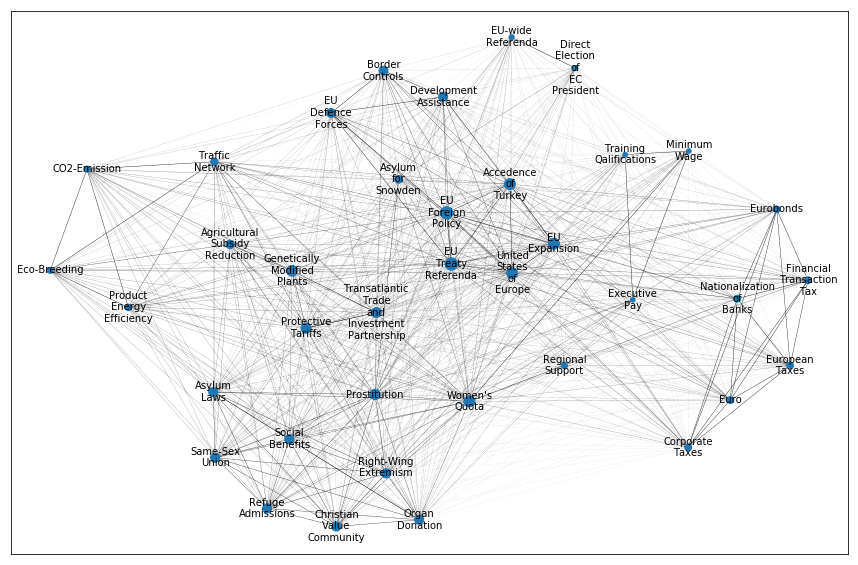

In [116]:
mynode_size = sklearn.preprocessing.normalize(df_commoncount_W_title.sum().astype("float").values.reshape(1, -1) )
adj = sklearn.preprocessing.normalize(df_commoncount_W_title.astype("float"))

#np.fill_diagonal(adj, 0)

G = nx.from_numpy_matrix(adj)

#pos = nx.circular_layout(G)
pos = nx.spring_layout(G)
edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]
weights = [adj[i] for i in edges]

labeldict = { i : lbl for i, lbl in enumerate(df_commoncount_W_title.index) }

plt.figure(figsize = (15, 10))
#nx.draw(G, pos, edges=edges, edge_color=colors, width=weights))
nx.draw_networkx_nodes(G, pos,
                       node_size= 500 * mynode_size)
nx.draw_networkx_labels(G, pos, 
                        labels=labeldict, 
                        font_size= 10)
nx.draw_networkx_edges(G, pos,
                       edges=edges,
                       width=weights)

#nx.draw(G, pos,        
#        edges=edges,
#        labels=labeldict,
#        width=weights,
#        node_size= 500 * mynode_size,
#        with_labels=True)
#colors


print()

/Users/sstolzen/mypackages/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


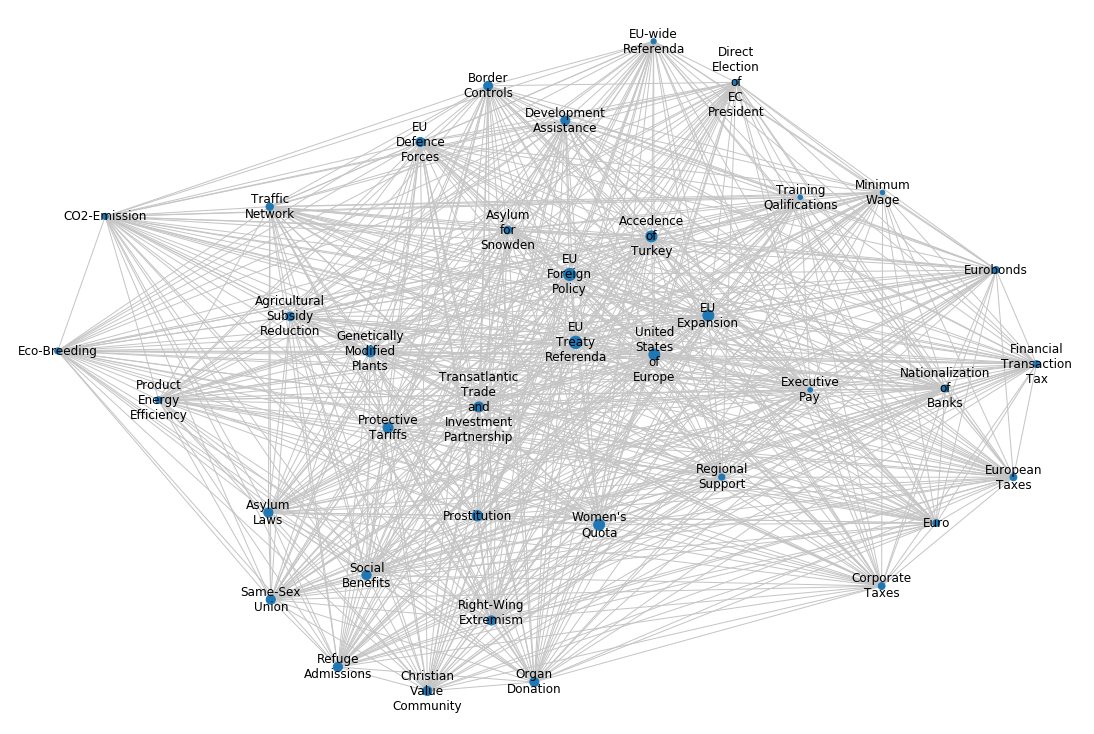

In [117]:
plt.figure(figsize = (15, 10))

nx.draw(G, pos,        
        edges=edges,
        labels=labeldict,
        edge_color="#C5C5C5",
        #width=1weights,
        width=1,
        node_size= 500 * mynode_size,
        with_labels=True)
plt.tight_layout()
plt.savefig("output/Wahlomat_title_cooccurences.pdf")